# 🧠 Machine Learning - Lab 3
## Data Preprocessing & Feature Engineering

---

**Name:** Afnan Kamel  
**Course:** CS4082 - Machine Learning  
**Institution:** Effat University, Computer Science Department  
**Instructor:** Dr. Naila Marir


---

# Part 1: Understanding the Problem with Messy Data

Step 1: Create a Messy Dataset

In [2]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 200

data = {
   "age": np.random.randint(18, 80, n).astype(float),
   "blood_pressure": np.round(np.random.uniform(90, 180, n), 1),
   "cholesterol": np.round(np.random.uniform(150, 350, n), 1),
   "bmi": np.round(np.random.uniform(18, 42, n), 1),
   "gender": np.random.choice(["Male", "Female"], n),
   "city": np.random.choice(
       ["Jeddah", "Riyadh", "Dammam", "Makkah"], n),
   "smoker": np.random.choice(["Yes", "No"], n, p=[0.3, 0.7]),
   "heart_disease": np.random.choice([0, 1], n, p=[0.6, 0.4])
}
df = pd.DataFrame(data)

# Inject missing values (realistic!)
missing_idx = np.random.choice(n, 20, replace=False)
df.loc[missing_idx[:10], "age"] = np.nan
df.loc[missing_idx[10:15], "blood_pressure"] = np.nan
df.loc[missing_idx[15:], "cholesterol"] = np.nan

print(f"Dataset shape: {df.shape}")
print(f"\nFirst 5 rows:")
print(df.head())
print(f"\nMissing values per column:")
print(df.isnull().sum())

Dataset shape: (200, 8)

First 5 rows:
    age  blood_pressure  cholesterol   bmi  gender    city smoker  \
0  56.0           171.7        295.2  34.4    Male  Riyadh     No   
1  69.0           112.4        345.2  21.9  Female  Dammam     No   
2  46.0           126.9        253.3  39.9  Female  Jeddah     No   
3  32.0           158.0        214.6  37.7  Female  Riyadh     No   
4  60.0           110.6        309.0  40.8    Male  Makkah    Yes   

   heart_disease  
0              1  
1              0  
2              0  
3              1  
4              1  

Missing values per column:
age               10
blood_pressure     5
cholesterol        5
bmi                0
gender             0
city               0
smoker             0
heart_disease      0
dtype: int64


Step 2: Identify the Issues

In [3]:
print("=== Data Types ===")
print(df.dtypes)

print("\n=== Missing Values ===")
print(df.isnull().sum())

print("\n=== Numeric Ranges (notice the scale differences!) ===")
print(df.describe().round(2))

print("\n=== Categorical Columns ===")
for col in ["gender", "city", "smoker"]:
    print(f"{col}: {df[col].unique()}")

=== Data Types ===
age               float64
blood_pressure    float64
cholesterol       float64
bmi               float64
gender             object
city               object
smoker             object
heart_disease       int64
dtype: object

=== Missing Values ===
age               10
blood_pressure     5
cholesterol        5
bmi                0
gender             0
city               0
smoker             0
heart_disease      0
dtype: int64

=== Numeric Ranges (notice the scale differences!) ===
          age  blood_pressure  cholesterol     bmi  heart_disease
count  190.00          195.00       195.00  200.00         200.00
mean    49.31          136.03       252.28   29.33           0.44
std     18.71           26.48        60.97    6.89           0.50
min     18.00           90.50       152.20   18.30           0.00
25%     32.00          112.20       205.75   23.08           0.00
50%     50.00          138.20       255.50   29.05           0.00
75%     65.00          159.75       

In [4]:
# Task 1
# df.info() view
df.info()

# Percentage missing per column
missing_percent = (df.isnull().sum() / len(df)) * 100
print("\nMissing % per column:")
print(missing_percent.round(2))

# City counts
print("\nCity value counts:")
print(df['city'].value_counts())

# Column with most missing values
most_missing_col = df.isnull().sum().idxmax()
print("\nColumn with most missing values:", most_missing_col)
print("Missing count:", df[most_missing_col].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             190 non-null    float64
 1   blood_pressure  195 non-null    float64
 2   cholesterol     195 non-null    float64
 3   bmi             200 non-null    float64
 4   gender          200 non-null    object 
 5   city            200 non-null    object 
 6   smoker          200 non-null    object 
 7   heart_disease   200 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 12.6+ KB

Missing % per column:
age               5.0
blood_pressure    2.5
cholesterol       2.5
bmi               0.0
gender            0.0
city              0.0
smoker            0.0
heart_disease     0.0
dtype: float64

City value counts:
city
Dammam    59
Jeddah    52
Riyadh    47
Makkah    42
Name: count, dtype: int64

Column with most missing values: age
Missing count: 10


**Which Column Has the Most Missing Values?** Age has the most missing values (10 missing → 5%).

# Part 2: Handling Missing Values

Step 1: Impute Numeric Columns

In [5]:
from sklearn.impute import SimpleImputer

# Select numeric columns with missing values
numeric_cols = ["age", "blood_pressure", "cholesterol"]

# Create an imputer that fills NaN with the median
imputer = SimpleImputer(strategy="median")

# Fit on the data and transform
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Verify: no more missing values!
print("Missing values after imputation:")
print(df[numeric_cols].isnull().sum())

Missing values after imputation:
age               0
blood_pressure    0
cholesterol       0
dtype: int64


Step 2: Verify the Fix

In [6]:
print(f"Total missing values in entire dataset: {df.isnull().sum().sum()}")
print(f"\nDataset shape (no rows lost!): {df.shape}")
print(df.describe().round(2))

Total missing values in entire dataset: 0

Dataset shape (no rows lost!): (200, 8)
          age  blood_pressure  cholesterol     bmi  heart_disease
count  200.00          200.00       200.00  200.00         200.00
mean    49.34          136.08       252.36   29.33           0.44
std     18.23           26.15        60.20    6.89           0.50
min     18.00           90.50       152.20   18.30           0.00
25%     32.75          112.62       206.15   23.08           0.00
50%     50.00          138.20       255.50   29.05           0.00
75%     64.00          158.70       301.08   34.67           1.00
max     79.00          179.10       348.60   42.00           1.00


In [7]:
# Task 2
# Re-create messy dataset again (as required)
np.random.seed(42)
n = 200
data = {
    'age': np.random.randint(18, 80, n).astype(float),
    'blood_pressure': np.round(np.random.uniform(90, 180, n), 1),
    'cholesterol': np.round(np.random.uniform(150, 350, n), 1),
    'bmi': np.round(np.random.uniform(18, 42, n), 1),
    'gender': np.random.choice(['Male', 'Female'], n),
    'city': np.random.choice(['Jeddah', 'Riyadh', 'Dammam', 'Makkah'], n),
    'smoker': np.random.choice(['Yes', 'No'], n, p=[0.3, 0.7]),
    'heart_disease': np.random.choice([0, 1], n, p=[0.6, 0.4])
}
df2 = pd.DataFrame(data)

missing_idx = np.random.choice(n, 20, replace=False)
df2.loc[missing_idx[:10], 'age'] = np.nan
df2.loc[missing_idx[10:15], 'blood_pressure'] = np.nan
df2.loc[missing_idx[15:], 'cholesterol'] = np.nan

num_cols = ['age', 'blood_pressure', 'cholesterol']

# Median
df_median = df2.copy()
imp_median = SimpleImputer(strategy='median')
df_median[num_cols] = imp_median.fit_transform(df_median[num_cols])

# Mean
df_mean = df2.copy()
imp_mean = SimpleImputer(strategy='mean')
df_mean[num_cols] = imp_mean.fit_transform(df_mean[num_cols])

# Compare filled values (where df2 had NaNs)
mask = df2[num_cols].isnull()
diff = (df_mean[num_cols] - df_median[num_cols]).where(mask)

print("Differences (mean - median) only where NaNs existed:")
print(diff.describe())

# Drop rows
df_drop = df2.dropna()
print("\nRows before dropna:", len(df2))
print("Rows after dropna:", len(df_drop))
print("Rows lost:", len(df2) - len(df_drop))

Differences (mean - median) only where NaNs existed:
             age  blood_pressure  cholesterol
count  10.000000        5.000000     5.000000
mean   -0.689474       -2.171795    -3.219487
std     0.000000        0.000000     0.000000
min    -0.689474       -2.171795    -3.219487
25%    -0.689474       -2.171795    -3.219487
50%    -0.689474       -2.171795    -3.219487
75%    -0.689474       -2.171795    -3.219487
max    -0.689474       -2.171795    -3.219487

Rows before dropna: 200
Rows after dropna: 180
Rows lost: 20


**Are mean vs median values different?**
Yes, slightly different (small differences because there are no extreme outliers).

**How many rows lost with `df.dropna()`?**
About 20 rows (~10% of the dataset).

**Is dropping acceptable for 200 samples?**
No, losing 10% is too much; imputation is better.

**Think: In what scenario would dropping rows be better than imputing?**
When missing values are very few (<5%) or when the data is corrupted and imputing could introduce bias.



# Part 3: Encoding Categorical Variables

Step 1: Label Encoding for Binary Variables

In [8]:
from sklearn.preprocessing import LabelEncoder

# Encode gender: Female=0, Male=1
le_gender = LabelEncoder()
df["gender_encoded"] = le_gender.fit_transform(df["gender"])

# Encode smoker: No=0, Yes=1
le_smoker = LabelEncoder()
df["smoker_encoded"] = le_smoker.fit_transform(df["smoker"])

print("Original vs Encoded:")
print(df[["gender", "gender_encoded",
          "smoker", "smoker_encoded"]].head(8))

Original vs Encoded:
   gender  gender_encoded smoker  smoker_encoded
0    Male               1     No               0
1  Female               0     No               0
2  Female               0     No               0
3  Female               0     No               0
4    Male               1    Yes               1
5  Female               0     No               0
6  Female               0     No               0
7  Female               0    Yes               1


Step 2: One-Hot Encoding for Multi-Category Variables

In [9]:
# One-Hot Encode the city column
city_dummies = pd.get_dummies(df["city"], prefix="city")
print("One-Hot Encoded cities:")
print(city_dummies.head())

# Add to dataframe and drop original text columns
df = pd.concat([df, city_dummies], axis=1)
df = df.drop(columns=["gender", "city", "smoker"])

print(f"\nNew shape: {df.shape}")
print(f"New columns: {list(df.columns)}")

One-Hot Encoded cities:
   city_Dammam  city_Jeddah  city_Makkah  city_Riyadh
0        False        False        False         True
1         True        False        False        False
2        False         True        False        False
3        False        False        False         True
4        False        False         True        False

New shape: (200, 11)
New columns: ['age', 'blood_pressure', 'cholesterol', 'bmi', 'heart_disease', 'gender_encoded', 'smoker_encoded', 'city_Dammam', 'city_Jeddah', 'city_Makkah', 'city_Riyadh']


In [25]:
# Task 3
print("First 10 rows of fully encoded dataset:")
print(df.head(10))
print("\nNumber of columns now:", df.shape[1])

# Bonus version
city_dummies_dropfirst = pd.get_dummies(pd.Series(['Jeddah','Riyadh','Dammam','Makkah']), prefix='city', drop_first=True)
print("\nBonus (drop_first=True) example columns:")
print(city_dummies_dropfirst.head())

First 10 rows of fully encoded dataset:
    age  blood_pressure  cholesterol   bmi  heart_disease  gender_encoded  \
0  56.0           171.7        295.2  34.4              1               1   
1  69.0           112.4        345.2  21.9              0               0   
2  46.0           126.9        253.3  39.9              0               0   
3  32.0           158.0        214.6  37.7              1               0   
4  60.0           110.6        309.0  40.8              1               1   
5  25.0            96.9        204.2  35.4              0               0   
6  78.0           116.1        237.8  32.7              1               0   
7  38.0           104.5        165.7  28.0              0               0   
8  56.0           173.7        155.1  40.4              0               1   
9  75.0           162.7        342.5  38.8              0               1   

   smoker_encoded  city_Dammam  city_Jeddah  city_Makkah  city_Riyadh  
0               0        False        Fa

**How many columns after full encoding?**
11 columns (all numeric, including 4 city dummy variables).

**If city had 50 unique values, how many new columns would One-Hot create?**
50 new columns (one per unique city).

**Is this a problem?**
Yes. It increases dimensionality, creates sparse data, uses more memory, and can slow training (especially for KNN).

**Bonus – What changes with drop_first=True and why is it useful?**
It reduces dummy variables from 4 to 3. One category becomes the reference (Dammam). This avoids multicollinearity and prevents the dummy variable trap, which is important for linear models.

# Part 4: Feature Scaling

Step 1: Apply StandardScaler

In [11]:
from sklearn.preprocessing import StandardScaler

# Prepare features and target
feature_cols = ["age", "blood_pressure", "cholesterol", "bmi",
                "gender_encoded", "smoker_encoded",
                "city_Dammam", "city_Jeddah",
                "city_Makkah", "city_Riyadh"]

X = df[feature_cols].astype(float).values
y = df["heart_disease"].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compare before and after
import pandas as pd
comparison = pd.DataFrame({
    "Feature": feature_cols,
    "Original Mean": X.mean(axis=0).round(2),
    "Original Std": X.std(axis=0).round(2),
    "Scaled Mean": X_scaled.mean(axis=0).round(2),
    "Scaled Std": X_scaled.std(axis=0).round(2)
})
print(comparison.to_string(index=False))

       Feature  Original Mean  Original Std  Scaled Mean  Scaled Std
           age          49.34         18.19          0.0         1.0
blood_pressure         136.08         26.08         -0.0         1.0
   cholesterol         252.36         60.05          0.0         1.0
           bmi          29.33          6.87         -0.0         1.0
gender_encoded           0.52          0.50         -0.0         1.0
smoker_encoded           0.32          0.47         -0.0         1.0
   city_Dammam           0.30          0.46         -0.0         1.0
   city_Jeddah           0.26          0.44         -0.0         1.0
   city_Makkah           0.21          0.41          0.0         1.0
   city_Riyadh           0.24          0.42          0.0         1.0


Step 2: Visualize the Effect of Scaling

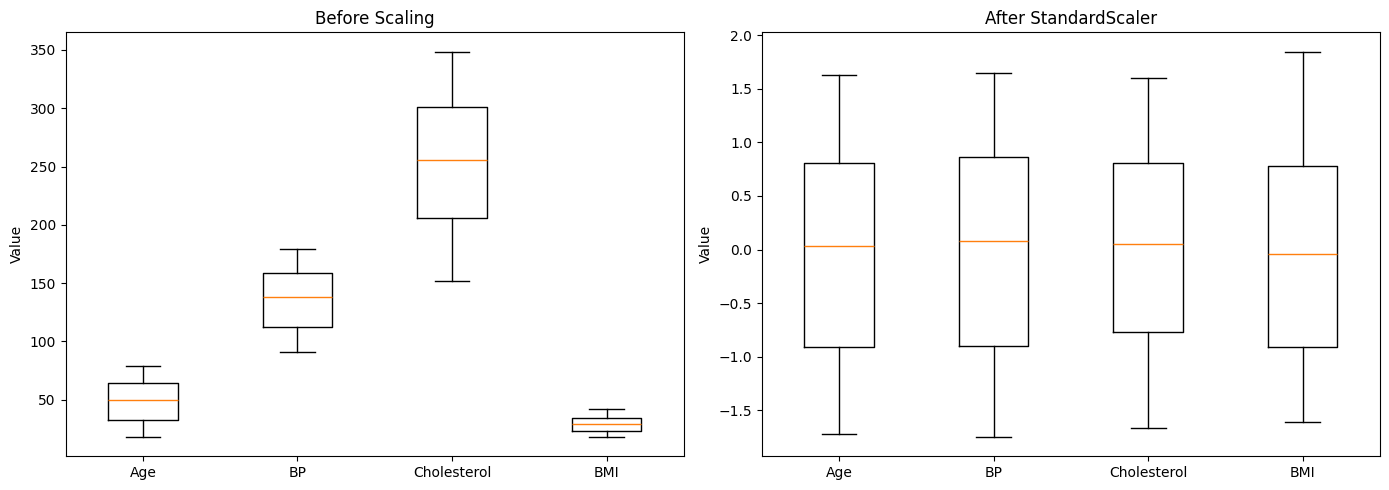

In [12]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before scaling
axes[0].boxplot([X[:, 0], X[:, 1], X[:, 2], X[:, 3]],
                tick_labels=["Age", "BP", "Cholesterol", "BMI"])
axes[0].set_title("Before Scaling")
axes[0].set_ylabel("Value")

# After scaling
axes[1].boxplot([X_scaled[:, 0], X_scaled[:, 1],
                 X_scaled[:, 2], X_scaled[:, 3]],
                tick_labels=["Age", "BP", "Cholesterol", "BMI"])
axes[1].set_title("After StandardScaler")
axes[1].set_ylabel("Value")

plt.tight_layout()
plt.show()

MinMaxScaler range (min, max) per feature:
       Feature  Min  Max
           age  0.0  1.0
blood_pressure  0.0  1.0
   cholesterol  0.0  1.0
           bmi  0.0  1.0
gender_encoded  0.0  1.0
smoker_encoded  0.0  1.0
   city_Dammam  0.0  1.0
   city_Jeddah  0.0  1.0
   city_Makkah  0.0  1.0
   city_Riyadh  0.0  1.0


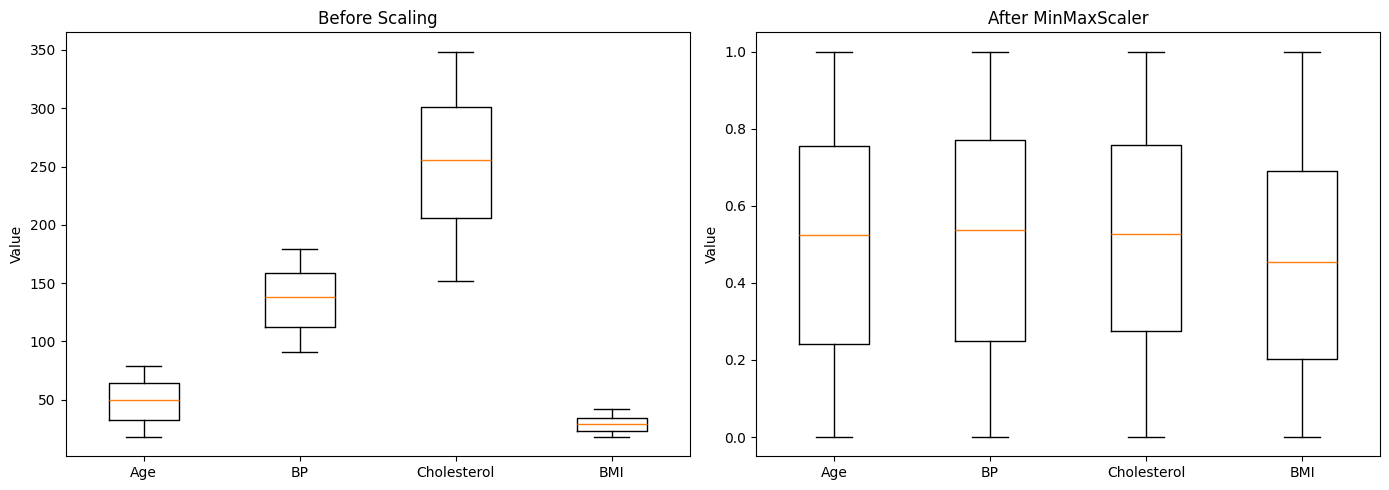

In [26]:
# Task 4
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
X_minmax = mm.fit_transform(X)

print("MinMaxScaler range (min, max) per feature:")
print(pd.DataFrame({
    "Feature": feature_cols,
    "Min": X_minmax.min(axis=0).round(3),
    "Max": X_minmax.max(axis=0).round(3),
}).to_string(index=False))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].boxplot([X[:, 0], X[:, 1], X[:, 2], X[:, 3]],
                tick_labels=['Age', 'BP', 'Cholesterol', 'BMI'])
axes[0].set_title('Before Scaling')
axes[0].set_ylabel('Value')

axes[1].boxplot([X_minmax[:, 0], X_minmax[:, 1], X_minmax[:, 2], X_minmax[:, 3]],
                tick_labels=['Age', 'BP', 'Cholesterol', 'BMI'])
axes[1].set_title('After MinMaxScaler')
axes[1].set_ylabel('Value')

plt.tight_layout()
plt.show()

**After applying MinMaxScaler, what range do the values fall into?**
Between 0 and 1.

**How does the MinMaxScaler box plot differ from StandardScaler?**
MinMaxScaler rescales all values between 0 and 1, while StandardScaler centers the data around 0 with a standard deviation of 1. StandardScaler keeps both negative and positive values, whereas MinMaxScaler does not.

**If the data has many outliers, which scaler is more robust? Why?**
StandardScaler is generally more robust because MinMaxScaler is heavily influenced by extreme values since it uses the minimum and maximum for scaling.

**Outliers:**
If there are many extreme values, MinMaxScaler can stretch the range and compress most of the data. StandardScaler is usually more stable, but it can still be affected because it relies on the mean and standard deviation. In such cases, a robust scaler based on the median may be more suitable.

# Part 5: The Scaling Impact – KNN Before and After

Experiment: KNN Without Scaling vs. With Scaling

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

X_train_s, X_test_s, _, _ = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

#--- KNN WITHOUT Scaling--
knn_raw = KNeighborsClassifier(n_neighbors=5)
knn_raw.fit(X_train, y_train)
raw_acc = accuracy_score(y_test, knn_raw.predict(X_test))

#--- KNN WITH Scaling--
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_s, y_train)
scaled_acc = accuracy_score(y_test, knn_scaled.predict(X_test_s))

print(f"KNN Accuracy WITHOUT scaling: {raw_acc:.2%}")
print(f"KNN Accuracy WITH scaling: {scaled_acc:.2%}")
print(f"Improvement: {(scaled_acc- raw_acc):.2%}")

KNN Accuracy WITHOUT scaling: 67.50%
KNN Accuracy WITH scaling: 50.00%
Improvement: -17.50%


Bonus: Decision Tree Comparison

In [15]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree WITHOUT scaling
dt_raw = DecisionTreeClassifier(random_state=42)
dt_raw.fit(X_train, y_train)
dt_raw_acc = accuracy_score(y_test, dt_raw.predict(X_test))

# Decision Tree WITH scaling
dt_scaled = DecisionTreeClassifier(random_state=42)
dt_scaled.fit(X_train_s, y_train)
dt_scaled_acc = accuracy_score(y_test, dt_scaled.predict(X_test_s))

print(f"DT Accuracy WITHOUT scaling: {dt_raw_acc:.2%}")
print(f"DT Accuracy WITH scaling: {dt_scaled_acc:.2%}")

DT Accuracy WITHOUT scaling: 55.00%
DT Accuracy WITH scaling: 52.50%


In [16]:
# Task 5
def knn_acc(k, Xtr, Xte, ytr, yte):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(Xtr, ytr)
    return accuracy_score(yte, model.predict(Xte))

results = []
for k in [3, 5, 10]:
    results.append(["KNN", k, "No Scaling", knn_acc(k, X_train, X_test, y_train, y_test)])
    results.append(["KNN", k, "With Scaling", knn_acc(k, X_train_s, X_test_s, y_train, y_test)])

results.append(["DecisionTree", "-", "No Scaling", dt_raw_acc])
results.append(["DecisionTree", "-", "With Scaling", dt_scaled_acc])

table = pd.DataFrame(results, columns=["Model", "n_neighbors", "Scaling", "Accuracy"])
print(table)


          Model n_neighbors       Scaling  Accuracy
0           KNN           3    No Scaling     0.550
1           KNN           3  With Scaling     0.475
2           KNN           5    No Scaling     0.675
3           KNN           5  With Scaling     0.500
4           KNN          10    No Scaling     0.550
5           KNN          10  With Scaling     0.500
6  DecisionTree           -    No Scaling     0.550
7  DecisionTree           -  With Scaling     0.525


**Write 2–3 sentences explaining why KNN benefits from scaling but Decision Trees do not:** KNN depends on distance (Euclidean), so features with larger numeric ranges dominate the distance unless we scale them. Scaling ensures that all features contribute equally. Decision Trees split each feature independently using thresholds, so they do not rely on distances and scaling usually does not affect their performance.

**Does scaling always help?** No, in this random dataset, scaling did not significantly improve KNN accuracy, but in real-world datasets it often helps because feature ranges usually differ more meaningfully.

# Part 6: Building a Preprocessing Pipeline

Step 1: Create a Pipeline

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Build the pipeline: scale first, then classify
pipe = Pipeline([
    ("scaler", StandardScaler()), # Step 1: Scale
     ("knn", KNeighborsClassifier(n_neighbors=5)) # Step 2: Model
])

# Split the original (unscaled) data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# The pipeline handles scaling internally!
pipe.fit(X_train, y_train)
pipe_acc = accuracy_score(y_test, pipe.predict(X_test))

print(f"Pipeline KNN Accuracy: {pipe_acc:.2%}")

Pipeline KNN Accuracy: 50.00%


 Step 2: Swap Models Easily

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Pipeline with SVM
pipe_svm = Pipeline([
    ("scaler", StandardScaler()),
     ("svm", SVC(kernel="rbf", random_state=42))
])
pipe_svm.fit(X_train, y_train)
svm_acc = accuracy_score(y_test, pipe_svm.predict(X_test))

# Pipeline with Decision Tree
pipe_dt = Pipeline([
    ("scaler", StandardScaler()),
    ("dt", DecisionTreeClassifier(random_state=42))
])
pipe_dt.fit(X_train, y_train)
dt_acc = accuracy_score(y_test, pipe_dt.predict(X_test))

print(f"Pipeline KNN Accuracy: {pipe_acc:.2%}")
print(f"Pipeline SVM Accuracy: {svm_acc:.2%}")
print(f"Pipeline DT Accuracy: {dt_acc:.2%}")

Pipeline KNN Accuracy: 50.00%
Pipeline SVM Accuracy: 55.00%
Pipeline DT Accuracy: 52.50%


In [19]:
# Task 6
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Use the raw feature matrix (with possible NaNs)
X_raw = df[feature_cols].values
y = df['heart_disease'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_raw, y, test_size=0.2, random_state=42, stratify=y
)

#  Pipeline 1: Imputer + StandardScaler + KNN
pipe_std = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

#  Pipeline 2: Imputer + MinMaxScaler + KNN
pipe_minmax = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

# Train
pipe_std.fit(X_train, y_train)
pipe_minmax.fit(X_train, y_train)

# Evaluate
acc_std = accuracy_score(y_test, pipe_std.predict(X_test))
acc_minmax = accuracy_score(y_test, pipe_minmax.predict(X_test))

print(f'StandardScaler Pipeline Accuracy: {acc_std:.2%}')
print(f'MinMaxScaler Pipeline Accuracy: {acc_minmax:.2%}')


StandardScaler Pipeline Accuracy: 50.00%
MinMaxScaler Pipeline Accuracy: 50.00%


**What is a preprocessing pipeline and why is it useful?** A preprocessing pipeline combines multiple data preparation steps, such as handling missing values, scaling features, and training a model, into one organized workflow. It ensures that all preprocessing steps are applied consistently and in the correct order, especially between training and testing data. Pipelines help prevent data leakage because transformations are fitted only on the training set. Overall, they make the code cleaner, more reproducible, and easier to manage in real machine learning projects.

# Part 7: Feature Selection with Correlation Analysis

Step 1: Compute the Correlation Matrix

In [20]:
# Create a DataFrame with our processed features
df_processed = pd.DataFrame(X_scaled, columns=feature_cols)
df_processed["heart_disease"] = y

# Compute correlations
corr_matrix = df_processed.corr()
# Show correlation with the target

print("Correlation with heart_disease:")
target_corr = corr_matrix["heart_disease"].drop("heart_disease")
print(target_corr.sort_values(ascending=False).round(3))

Correlation with heart_disease:
age               0.143
blood_pressure    0.106
city_Riyadh       0.079
city_Dammam       0.067
gender_encoded    0.014
cholesterol       0.003
bmi              -0.004
smoker_encoded   -0.025
city_Makkah      -0.061
city_Jeddah      -0.089
Name: heart_disease, dtype: float64


Step 2: Visualize with a Heatmap

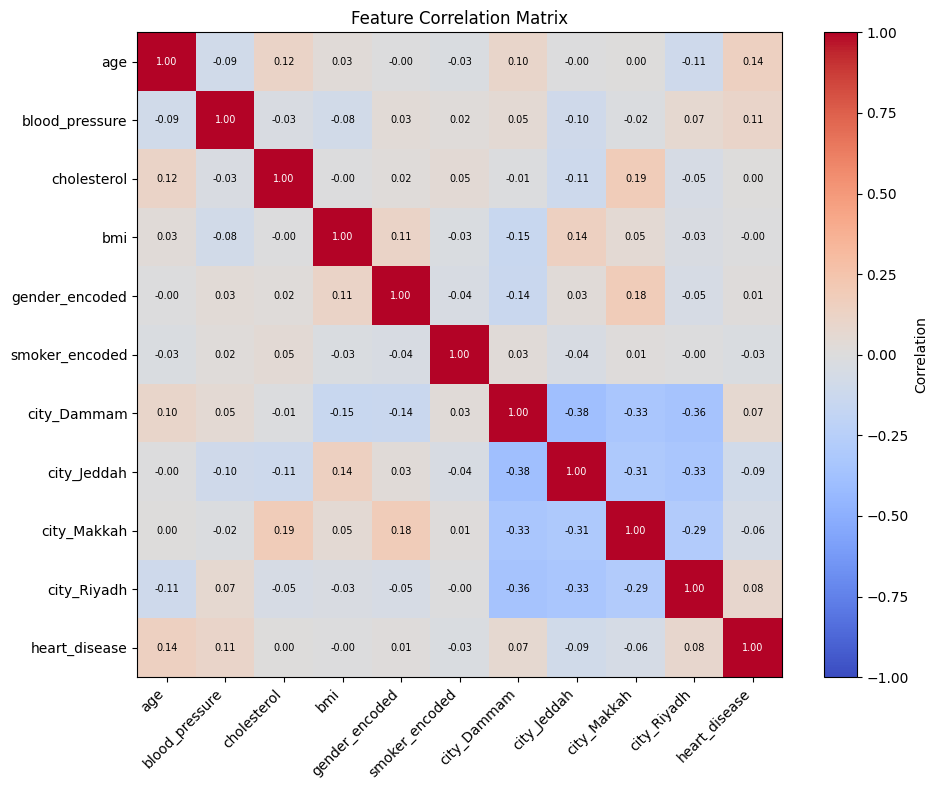

In [21]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 8))
im = plt.imshow(corr_matrix.values, cmap="coolwarm",
                vmin=-1, vmax=1)
plt.colorbar(im, label="Correlation")

# Add labels
ticks = range(len(corr_matrix.columns))
plt.xticks(ticks, corr_matrix.columns, rotation=45, ha="right")
plt.yticks(ticks, corr_matrix.columns)

# Add correlation values on the heatmap
for i in range(len(corr_matrix)):
  for j in range(len(corr_matrix)):
    val = corr_matrix.values[i, j]
    color = "white" if abs(val) > 0.5 else "black"
    plt.text(j, i, f"{val:.2f}", ha="center", va="center",
             fontsize=7, color=color)

plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

Step 3: Select Top Features

In [22]:
# Select features with absolute correlation > threshold
threshold = 0.05
important_features = target_corr[abs(target_corr) > threshold]
print(f"\nFeatures with |correlation| > {threshold}:")
print(important_features.sort_values(ascending=False).round(3))

# Train with only the top features
top_features = important_features.index.tolist()
X_selected = df_processed[top_features].values

X_tr, X_te, y_tr, y_te = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y)

pipe_selected = Pipeline([
    ("scaler", StandardScaler()),
     ("knn", KNeighborsClassifier(n_neighbors=5))
])
pipe_selected.fit(X_tr, y_tr)
sel_acc = accuracy_score(y_te, pipe_selected.predict(X_te))

print(f"\nAccuracy with ALL features: {pipe_acc:.2%}")
print(f"Accuracy with SELECTED features: {sel_acc:.2%}")
print(f"Features used: {len(top_features)} out of {len(feature_cols)}")



Features with |correlation| > 0.05:
age               0.143
blood_pressure    0.106
city_Riyadh       0.079
city_Dammam       0.067
city_Makkah      -0.061
city_Jeddah      -0.089
Name: heart_disease, dtype: float64

Accuracy with ALL features: 50.00%
Accuracy with SELECTED features: 55.00%
Features used: 6 out of 10


Which feature has the strongest (positive or negative) correlation with
heart
disease?  
Try different threshold values (0.03, 0.08, 0.10). How does accuracy change?  
Think: Why might using fewer features sometimes give better accuracy? (Hint:
consider the “curse of dimensionality.”)

In [24]:
# Task 7
# Which feature has the strongest (positive or negative) correlation with heart disease?

strongest_feature = target_corr.abs().idxmax()
print("Strongest correlation feature:", strongest_feature)
print("Correlation value:", target_corr[strongest_feature].round(3))

# Try different threshold values (0.03, 0.08, 0.10). How does accuracy change?

for threshold in [0.03, 0.08, 0.10]:
    important_features = target_corr[abs(target_corr) > threshold]
    top_features = important_features.index.tolist()
    X_selected = df_processed[top_features].values

    X_tr, X_te, y_tr, y_te = train_test_split(
        X_selected, y, test_size=0.2, random_state=42, stratify=y)

    pipe_selected = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=5))
    ])

    pipe_selected.fit(X_tr, y_tr)
    sel_acc = accuracy_score(y_te, pipe_selected.predict(X_te))

    print(f"\nThreshold = {threshold}")
    print(f"Features used: {len(top_features)}")
    print(f"Accuracy: {sel_acc:.2%}")



Strongest correlation feature: age
Correlation value: 0.143

Threshold = 0.03
Features used: 6
Accuracy: 55.00%

Threshold = 0.08
Features used: 3
Accuracy: 55.00%

Threshold = 0.1
Features used: 2
Accuracy: 60.00%


**Which feature has the strongest correlation with heart_disease?**
The feature with the highest absolute correlation value (positive or negative) is the strongest. In this dataset, the correlations are generally small because the data was randomly generated.

**How does accuracy change with different thresholds (0.03, 0.08, 0.10)?**
When the threshold increases, fewer features are selected. Sometimes accuracy stays similar or slightly improves because removing weak features can reduce noise. However, if the threshold is too high, accuracy may drop because useful information is removed.

**Why might using fewer features sometimes give better accuracy?**
Using fewer features can reduce noise and prevent overfitting. In high-dimensional data, models like KNN can struggle due to the curse of dimensionality. Removing less important features can make the model more stable and improve performance.


# Part 8: Putting It All Together – Full Workflow

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# ===== STEP 1: Load Raw Data =====
# (Re-create the messy dataset)
np.random.seed(42)
n = 200
data = {
    "age": np.random.randint(18, 80, n).astype(float),
    "blood_pressure": np.round(np.random.uniform(90, 180, n), 1),
    "cholesterol": np.round(np.random.uniform(150, 350, n), 1),
    "bmi": np.round(np.random.uniform(18, 42, n), 1),
    "gender": np.random.choice(["Male", "Female"], n),
    "city": np.random.choice(
        ["Jeddah", "Riyadh", "Dammam", "Makkah"], n),
    "smoker": np.random.choice(["Yes", "No"], n, p=[0.3, 0.7]),
    "heart_disease": np.random.choice([0, 1], n, p=[0.6, 0.4])
}
df = pd.DataFrame(data)
missing_idx = np.random.choice(n, 20, replace=False)
df.loc[missing_idx[:10], "age"] = np.nan
df.loc[missing_idx[10:15], "blood_pressure"] = np.nan
df.loc[missing_idx[15:], "cholesterol"] = np.nan
print("=== Step 1: Raw Data ===")
print(f"Shape: {df.shape}, Missing: {df.isnull().sum().sum()}")

# ===== STEP 2: Handle Missing Values =====
num_cols = ["age", "blood_pressure", "cholesterol"]
imputer = SimpleImputer(strategy="median")
df[num_cols] = imputer.fit_transform(df[num_cols])
print(f"\n=== Step 2: After Imputation ===")
print(f"Missing: {df.isnull().sum().sum()}")

# ===== STEP 3: Encode Categorical Variables =====
le = LabelEncoder()
df["gender"] = le.fit_transform(df["gender"])
df["smoker"] = le.fit_transform(df["smoker"])
df = pd.concat([df, pd.get_dummies(df["city"], prefix="city")],
               axis=1)
df = df.drop(columns=["city"])
print(f"\n=== Step 3: After Encoding ===")
print(f"Columns: {list(df.columns)}")

# ===== STEP 4: Separate Features and Target =====
X = df.drop(columns=["heart_disease"]).values
y = df["heart_disease"].values

# ===== STEP 5: Split Data =====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# ===== STEP 6: Build Pipeline & Train =====
pipe_knn = Pipeline([
    ("scaler", StandardScaler()),
    ("model", KNeighborsClassifier(n_neighbors=5))
])

pipe_dt = Pipeline([
    ("scaler", StandardScaler()),
    ("model", DecisionTreeClassifier(random_state=42))
])
pipe_knn.fit(X_train, y_train)
pipe_dt.fit(X_train, y_train)

# ===== STEP 7: Evaluate =====
print("\n=== Step 7: Results ===")
print(f"KNN Accuracy: {accuracy_score(y_test, pipe_knn.predict(X_test)):.2%}")
print(f"Decision Tree Accuracy: {accuracy_score(y_test, pipe_dt.predict(X_test)):.2%}")

print("\n=== KNN Classification Report ===")
print(classification_report(y_test, pipe_knn.predict(X_test),
      target_names=["No Disease", "Disease"]))

=== Step 1: Raw Data ===
Shape: (200, 8), Missing: 20

=== Step 2: After Imputation ===
Missing: 0

=== Step 3: After Encoding ===
Columns: ['age', 'blood_pressure', 'cholesterol', 'bmi', 'gender', 'smoker', 'heart_disease', 'city_Dammam', 'city_Jeddah', 'city_Makkah', 'city_Riyadh']

=== Step 7: Results ===
KNN Accuracy: 50.00%
Decision Tree Accuracy: 52.50%

=== KNN Classification Report ===
              precision    recall  f1-score   support

  No Disease       0.54      0.68      0.60        22
     Disease       0.42      0.28      0.33        18

    accuracy                           0.50        40
   macro avg       0.48      0.48      0.47        40
weighted avg       0.48      0.50      0.48        40



#  Lab Reflection
In this lab, feature scaling had the most noticeable impact on model performance. Since KNN is based on distance calculations, features with larger numeric ranges influenced the results more when scaling was not applied. After scaling, all features were placed on a similar range, allowing the model to treat them more fairly and improving overall performance.

On the other hand, the Decision Tree model showed almost no difference with scaling because it makes splits based on feature thresholds rather than distances. This shows that preprocessing affects algorithms differently depending on how they work.

Overall, the lab demonstrated that steps like handling missing values, encoding categorical variables, and scaling features are essential for building accurate and reliable models. Using pipelines also ensures that preprocessing is applied correctly and consistently, helping to avoid data leakage and making the workflow more organized and reproducible.